In [1]:
import pandas as pd
import numpy as np
from src.dictionaries import features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
df = pd.read_csv('data/full_dataset.csv')

In [2]:
X = df.loc[:,features].values
y_recovery = df.loc[:,['recovery']] * 1
y_delta = df.loc[:,['delta']]
X = StandardScaler().fit_transform(X)
pca = PCA(n_components = 20)
pca.fit(X)
pca.explained_variance_ratio_



array([0.07710599, 0.01767315, 0.01023223, 0.00857536, 0.00823508,
       0.00693163, 0.00625316, 0.00614815, 0.00568603, 0.00503599,
       0.00490462, 0.00461192, 0.00437541, 0.00414063, 0.00403654,
       0.00383881, 0.00359156, 0.00345878, 0.00342762, 0.00337442])

In [7]:
X = df.loc[:,features].values
y_recovery = (df.loc[:,['recovery']] * 1)
y_delta = df.loc[:,['delta']]
X_train, X_test, y_train, y_test = train_test_split(X, y_recovery, test_size=.2, random_state=7)
# y_train.reshape(len(y_train),)
# y_test.reshape(len(y_test),)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
logisticRegr = LogisticRegression(solver = 'saga')
logisticRegr.fit(X_train, y_train.values.ravel())
logisticRegr.score(X_test, y_test)

/home/cj/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.6337164750957854

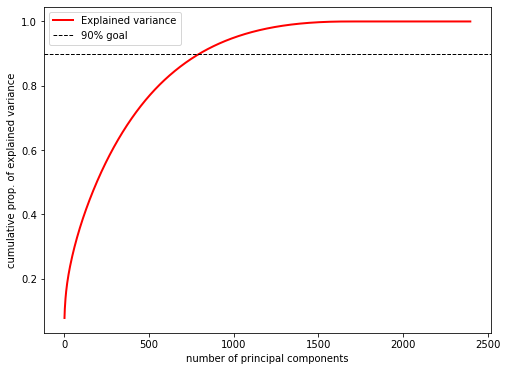

In [8]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(prop_var_expl, color='red', linewidth=2, label='Explained variance')
ax.axhline(0.9, label='90% goal', linestyle='--', color="black", linewidth=1)
ax.set_ylabel('cumulative prop. of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();